## Plot (a) catalytic performance, (b) total refueling station cost, (c) cost breakdown vs. dehydrogenation temperature and pressure for a single catalyst

### IMPORT MODULES

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# update plot formatting
mpl.rcParams.update({'font.size': 12})
mpl.rcParams.update({'mathtext.default': 'rm'})
mpl.rcParams.update({'font.family': 'sans-serif'})
mpl.rcParams.update({'font.sans-serif': 'Calibri'})

### USER INPUT

In [3]:
# system analysis output folder to read from
folder_sys = 'outputs 2024-05-03 Pd 4nm'

In [4]:
# cross-scale analysis input/output handoff folder
folder_s2a = 'cross-scale data handoff'

In [5]:
# user-defined input parameter names for plots
input_params_varied_user = [
    'scenario', 
    'dehydr. reaction temperature (K)', 
    'dehydr. reaction pressure (bar)',
    ]

In [6]:
# set baseline pressure
base_pres_bar = 1.0

# set baseline temperature
base_temp_C = 300.0 - 273.15

In [7]:
# specify line colors for line plot
# https://seaborn.pydata.org/tutorial/color_palettes.html
colors = (
    sns.color_palette('colorblind')[0], 
    sns.color_palette('colorblind')[3],
    sns.color_palette('colorblind')[2],
    sns.color_palette('colorblind')[4],
    sns.color_palette('colorblind')[8],
    sns.color_palette('colorblind')[9],
    sns.color_palette('colorblind')[5],
)

In [8]:
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

### READ INPUT PARAMETERS

In [9]:
# read input parameter map
df_input_params = pd.read_csv(
    os.path.join('..\outputs', folder_sys, 'input params.csv'),
    index_col='run #'
    )

# extract output dollar year
output_dollar_year = df_input_params['output dollar year'].values[0]

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\yuan13\AppData\Local\Temp\ipykernel_15596\577551652.py:3: SyntaxWarning: invalid escape sequence '\o'
  os.path.join('..\outputs', folder_sys, 'input params.csv'),


In [10]:
# read varied input parameters
df_input_params_varied_all = pd.read_csv(
    os.path.join('..\outputs', folder_sys, 'input params_varied.csv'), 
    index_col='run #'
    )

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\yuan13\AppData\Local\Temp\ipykernel_15596\1058259500.py:3: SyntaxWarning: invalid escape sequence '\o'
  os.path.join('..\outputs', folder_sys, 'input params_varied.csv'),


In [11]:
# create dataframe of input parameters to plot
df_input_params_varied_plot = df_input_params_varied_all.copy()

# use user-defined input parameters for plots if not empty
if input_params_varied_user:
    df_input_params_varied_plot = \
        df_input_params_varied_all[input_params_varied_user]
    
df_input_params_varied_plot

,scenario,dehydr. reaction temperature (K),dehydr. reaction pressure (bar)
run #,,,
0,baseline,300.000000,1.000000
1,Pd 4nm,300.000000,1.000000
2,Pd 4nm,310.526316,1.000000
3,Pd 4nm,321.052632,1.000000
4,Pd 4nm,331.578947,1.000000
5,Pd 4nm,342.105263,1.000000
6,Pd 4nm,352.631579,1.000000
7,Pd 4nm,363.157895,1.000000
8,Pd 4nm,373.684211,1.000000


### DATA PROCESSING: total refueling station cost

In [12]:
# read csv
f = 'output_all runs_refueling station costs.csv'
df_stn = pd.read_csv(
    os.path.join('..\outputs', folder_sys, f), 
    index_col='run #'
    )

# merge in varied input parameters
df_stn = df_input_params_varied_plot.merge(
    right = df_stn, 
    on='run #', 
    how='right'
    )

# drop "default" results
df_stn = df_stn.loc[df_stn.index != 0]

df_stn

<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:4: SyntaxWarning: invalid escape sequence '\o'
C:\Users\yuan13\AppData\Local\Temp\ipykernel_15596\1864764514.py:4: SyntaxWarning: invalid escape sequence '\o'
  os.path.join('..\outputs', folder_sys, f),


,scenario,dehydr. reaction temperature (K),dehydr. reaction pressure (bar),pathway,process,location,function,equipment,variable group,variable name,unit,value
run #,,,,,,,,,,,,
1,Pd 4nm,300.000000,1.0,all,all,all,all,all,input parameter,dehydr. reactor volume,m^3,7.310286e-02
1,Pd 4nm,300.000000,1.0,all,all,all,all,all,input parameter,dehydr. catalyst amount,kg,9.646712e+00
1,Pd 4nm,300.000000,1.0,LOHC - formic acid,reconditioning,refueling station,pumping,reactor pump,energy cost,electricity cost,$/yr,0.000000e+00
1,Pd 4nm,300.000000,1.0,LOHC - formic acid,reconditioning,refueling station,pumping,reactor pump,energy cost,electricity cost,$/kg H2,0.000000e+00
1,Pd 4nm,300.000000,1.0,LOHC - formic acid,reconditioning,refueling station,pumping,reactor pump,O&M cost,"operation, maintenance, repair costs",$/yr,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
54,Pd 4nm,384.210526,100.0,LOHC - formic acid,reconditioning,refueling station,cooling,refrigerator,capital cost,levelized capital cost,$/kg H2,8.786406e-02
54,Pd 4nm,384.210526,100.0,LOHC - formic acid,reconditioning,refueling station,storage,liquid storage,capital cost,levelized capital cost,$/yr,6.718135e+04
54,Pd 4nm,384.210526,100.0,LOHC - formic acid,reconditioning,refueling station,storage,liquid storage,capital cost,levelized capital cost,$/kg H2,1.840585e-02


In [13]:
# filter results by units
df_stn_usd_per_kg = df_stn.loc[df_stn['unit'] == '$/kg H2'].copy()

In [14]:
# calculate total refueling station costs 
# as a function of temperature and pressure
df_stn_tot = df_stn_usd_per_kg.groupby(
    by = df_input_params_varied_plot.columns.tolist()
    )['value'].sum().reset_index()

# rename columns
df_stn_tot.rename(
    columns = {
        'value' : '$/kg H2'
        }, 
    inplace=True
    )

# convert temperature to deg.C
df_stn_tot['dehydr. reaction temperature (C)'] = \
    df_stn_tot['dehydr. reaction temperature (K)'] - 273.15

# drop high temperatures (rows)
# formic acid boiling point = 100.8 deg.C
df_stn_tot = df_stn_tot[
    df_stn_tot['dehydr. reaction temperature (C)'] < 95
]

df_stn_tot

,scenario,dehydr. reaction temperature (K),dehydr. reaction pressure (bar),$/kg H2,dehydr. reaction temperature (C)
0,Pd 4nm,300.000000,1.000000,6.087458,26.850000
1,Pd 4nm,300.000000,21.842105,5.177932,26.850000
2,Pd 4nm,300.000000,42.684211,4.941108,26.850000
3,Pd 4nm,300.000000,63.526316,4.639777,26.850000
4,Pd 4nm,300.000000,84.368421,4.505568,26.850000
5,Pd 4nm,300.000000,100.000000,4.424435,26.850000
6,Pd 4nm,310.526316,1.000000,6.017401,37.376316
7,Pd 4nm,310.526316,21.842105,5.103211,37.376316
8,Pd 4nm,310.526316,42.684211,4.866552,37.376316
9,Pd 4nm,310.526316,63.526316,4.565221,37.376316


### DATA PROCESSING: refueling station cost breakdown

In [15]:
# create dataframe for refueling station cost breakdown
df_stn_remap = df_stn_usd_per_kg.copy()

# remap functions 
# (break out reactor and catalyst costs)
df_stn_remap['function, remapped'] = df_stn_remap['function'].copy()
df_stn_remap['function, remapped'].mask(
    df_stn_remap['function'] == 'reaction',
    other=df_stn_remap['equipment'], 
    inplace=True
    )

# sum results by remapped function
df_stn_remap = df_stn_remap.groupby(
    by = df_input_params_varied_plot.columns.tolist() + \
    ['function, remapped']
    )['value'].sum().reset_index()

# rename columns
df_stn_remap.rename(
    columns = {
        'function, remapped' : 'function',
        'value' : '$/kg H2'
        }, 
    inplace = True
    )

# convert temperature to deg.C
df_stn_remap['dehydr. reaction temperature (C)'] = \
    df_stn_remap['dehydr. reaction temperature (K)'] - 273.15

df_stn_remap

C:\Users\yuan13\AppData\Local\Temp\ipykernel_15596\893117184.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_stn_remap['function, remapped'].mask(


,scenario,dehydr. reaction temperature (K),dehydr. reaction pressure (bar),function,$/kg H2,dehydr. reaction temperature (C)
0,Pd 4nm,300.000000,1.0,catalyst,0.135064,26.850000
1,Pd 4nm,300.000000,1.0,compression,2.604754,26.850000
2,Pd 4nm,300.000000,1.0,cooling,0.184068,26.850000
3,Pd 4nm,300.000000,1.0,pumping,0.000000,26.850000
4,Pd 4nm,300.000000,1.0,reactor,0.035138,26.850000
...,...,...,...,...,...,...
373,Pd 4nm,384.210526,100.0,cooling,0.247410,111.060526
374,Pd 4nm,384.210526,100.0,pumping,0.112749,111.060526
375,Pd 4nm,384.210526,100.0,reactor,0.289077,111.060526
376,Pd 4nm,384.210526,100.0,separation,1.658625,111.060526


In [16]:
# get list of refueling station functions
stn_functions = df_stn_remap['function'].unique().tolist()

stn_functions

['catalyst',
 'compression',
 'cooling',
 'pumping',
 'reactor',
 'separation',
 'storage']

### DATA PROCESSING: catalytic rate vs. reaction conditions

In [17]:
# read csv
df_H2_rate = pd.read_excel(
    os.path.join('..', folder_s2a, 'H2_production.xlsx'), 
    sheet_name='formatted',
    header=1,
    )

# convert temperature to deg.C
df_H2_rate['temperature (C)'] = df_H2_rate['temperature (K)'] - 273.15

# update index
df_H2_rate.drop(columns = 'temperature (K)', inplace=True)
df_H2_rate.set_index('temperature (C)', inplace=True)

# transpose dataframe
df_H2_rate = df_H2_rate.T.rename_axis('pressure (bar)')

# drop high temperatures (columns)
# formic acid boiling point = 100.8 deg.C
df_H2_rate = df_H2_rate[df_H2_rate.columns[df_H2_rate.columns < 95]]

df_H2_rate

temperature (C),90.007895,83.692105,77.376316,71.060526,64.744737,58.428947,52.113158,45.797368,39.481579,33.165789,26.850000
pressure (bar),,,,,,,,,,,
100,7.289989,4.264702,2.446571,1.374925,0.756068,0.406322,0.213125,0.108950,0.054197,0.026190,0.012272
94.789474,7.289475,4.264471,2.446471,1.374883,0.756050,0.406316,0.213122,0.108949,0.054196,0.026190,0.012272
89.578947,7.288921,4.264223,2.446362,1.374837,0.756032,0.406308,0.213119,0.108948,0.054196,0.026190,0.012272
84.368421,7.288322,4.263954,2.446245,1.374788,0.756012,0.406300,0.213116,0.108947,0.054196,0.026190,0.012272
79.157895,7.287671,4.263662,2.446118,1.374734,0.755990,0.406292,0.213113,0.108946,0.054195,0.026190,0.012272
73.947368,7.286961,4.263343,2.445980,1.374676,0.755966,0.406282,0.213109,0.108944,0.054195,0.026190,0.012272
68.736842,7.286181,4.262994,2.445827,1.374612,0.755940,0.406272,0.213106,0.108943,0.054194,0.026189,0.012272
63.526316,7.285320,4.262607,2.445659,1.374541,0.755911,0.406261,0.213101,0.108941,0.054194,0.026189,0.012272
58.315789,7.284363,4.262178,2.445472,1.374462,0.755879,0.406248,0.213096,0.108939,0.054193,0.026189,0.012272


In [18]:
# find dehydr. temperatures and pressures to plot
H2_rate_pres_bar = df_H2_rate.index.tolist()
H2_rate_temp_C = df_H2_rate.columns.tolist()

### 1D PLOT: refueling station cost breakdown vs. dehydrogenation temperature _or_ pressure

In [19]:
# create dataframe at baseline pressure
df_stn_remap_fix_pres = df_stn_remap.loc[
    df_stn_remap['dehydr. reaction pressure (bar)'] == base_pres_bar]

# filter columns for plot
df_stn_remap_fix_pres = df_stn_remap_fix_pres[[
    'dehydr. reaction temperature (C)',
    'function',
    '$/kg H2'
]]

# pivot dataframe
df_stn_remap_fix_pres = df_stn_remap_fix_pres.pivot(
    columns='function',
    index='dehydr. reaction temperature (C)',
    values='$/kg H2',
    ).reset_index()

df_stn_remap_fix_pres

function,dehydr. reaction temperature (C),catalyst,compression,cooling,pumping,reactor,separation,storage
0,26.850000,0.135064,2.604754,0.184068,0.0,0.035138,2.672809,0.455625
1,37.376316,0.056680,2.604937,0.191955,0.0,0.035142,2.673002,0.455685
2,47.902632,0.025199,2.605011,0.199835,0.0,0.035144,2.673080,0.455709
3,58.428947,0.011787,2.605042,0.207712,0.0,0.035145,2.673114,0.455720
4,68.955263,0.005783,2.605056,0.215588,0.0,0.035145,2.673128,0.455724
5,79.481579,0.002956,2.605063,0.223464,0.0,0.035145,2.673135,0.455726
6,90.007895,0.001570,2.605066,0.231339,0.0,0.035145,2.673139,0.455727
7,100.534211,0.000868,2.605068,0.239214,0.0,0.035145,2.673141,0.455728
8,111.060526,0.000499,2.605069,0.247089,0.0,0.035145,2.673142,0.455728


In [20]:
# create dataframe at baseline temperature
df_stn_remap_fix_temp = df_stn_remap.loc[
    df_stn_remap['dehydr. reaction temperature (C)'] == base_temp_C]

# filter columns for plot
df_stn_remap_fix_temp = df_stn_remap_fix_temp[[
    'dehydr. reaction pressure (bar)',
    'function',
    '$/kg H2'
]]

# pivot dataframe
df_stn_remap_fix_temp = df_stn_remap_fix_temp.pivot(
    columns='function',
    index='dehydr. reaction pressure (bar)',
    values='$/kg H2',
    ).reset_index()

df_stn_remap_fix_temp

function,dehydr. reaction pressure (bar),catalyst,compression,cooling,pumping,reactor,separation,storage
0,1.000000,0.135064,2.604754,0.184068,0.000000,0.035138,2.672809,0.455625
1,21.842105,0.140421,2.559658,0.183956,0.103141,0.084241,1.651441,0.455074
2,42.684211,0.140434,2.115115,0.184021,0.105660,0.288005,1.652477,0.455395
3,63.526316,0.140476,1.805828,0.184237,0.108295,0.288600,1.655889,0.456453
4,84.368421,0.140493,1.666851,0.184327,0.110834,0.288849,1.657318,0.456896
5,100.000000,0.140504,1.582409,0.184384,0.112729,0.289007,1.658224,0.457177


<>:35: SyntaxWarning: invalid escape sequence '\d'
<>:75: SyntaxWarning: invalid escape sequence '\d'
<>:84: SyntaxWarning: invalid escape sequence '\$'
<>:35: SyntaxWarning: invalid escape sequence '\d'
<>:75: SyntaxWarning: invalid escape sequence '\d'
<>:84: SyntaxWarning: invalid escape sequence '\$'
C:\Users\yuan13\AppData\Local\Temp\ipykernel_15596\360614494.py:35: SyntaxWarning: invalid escape sequence '\d'
  'Refueling station cost, {:0.0f} $\degree$C'.format(base_temp_C),
C:\Users\yuan13\AppData\Local\Temp\ipykernel_15596\360614494.py:75: SyntaxWarning: invalid escape sequence '\d'
  ax[0].set_xlabel('Dehydrogenation temperature ($\degree$C)')
C:\Users\yuan13\AppData\Local\Temp\ipykernel_15596\360614494.py:84: SyntaxWarning: invalid escape sequence '\$'
  ' ({:0.0f}\$/kg'.format(output_dollar_year) + \


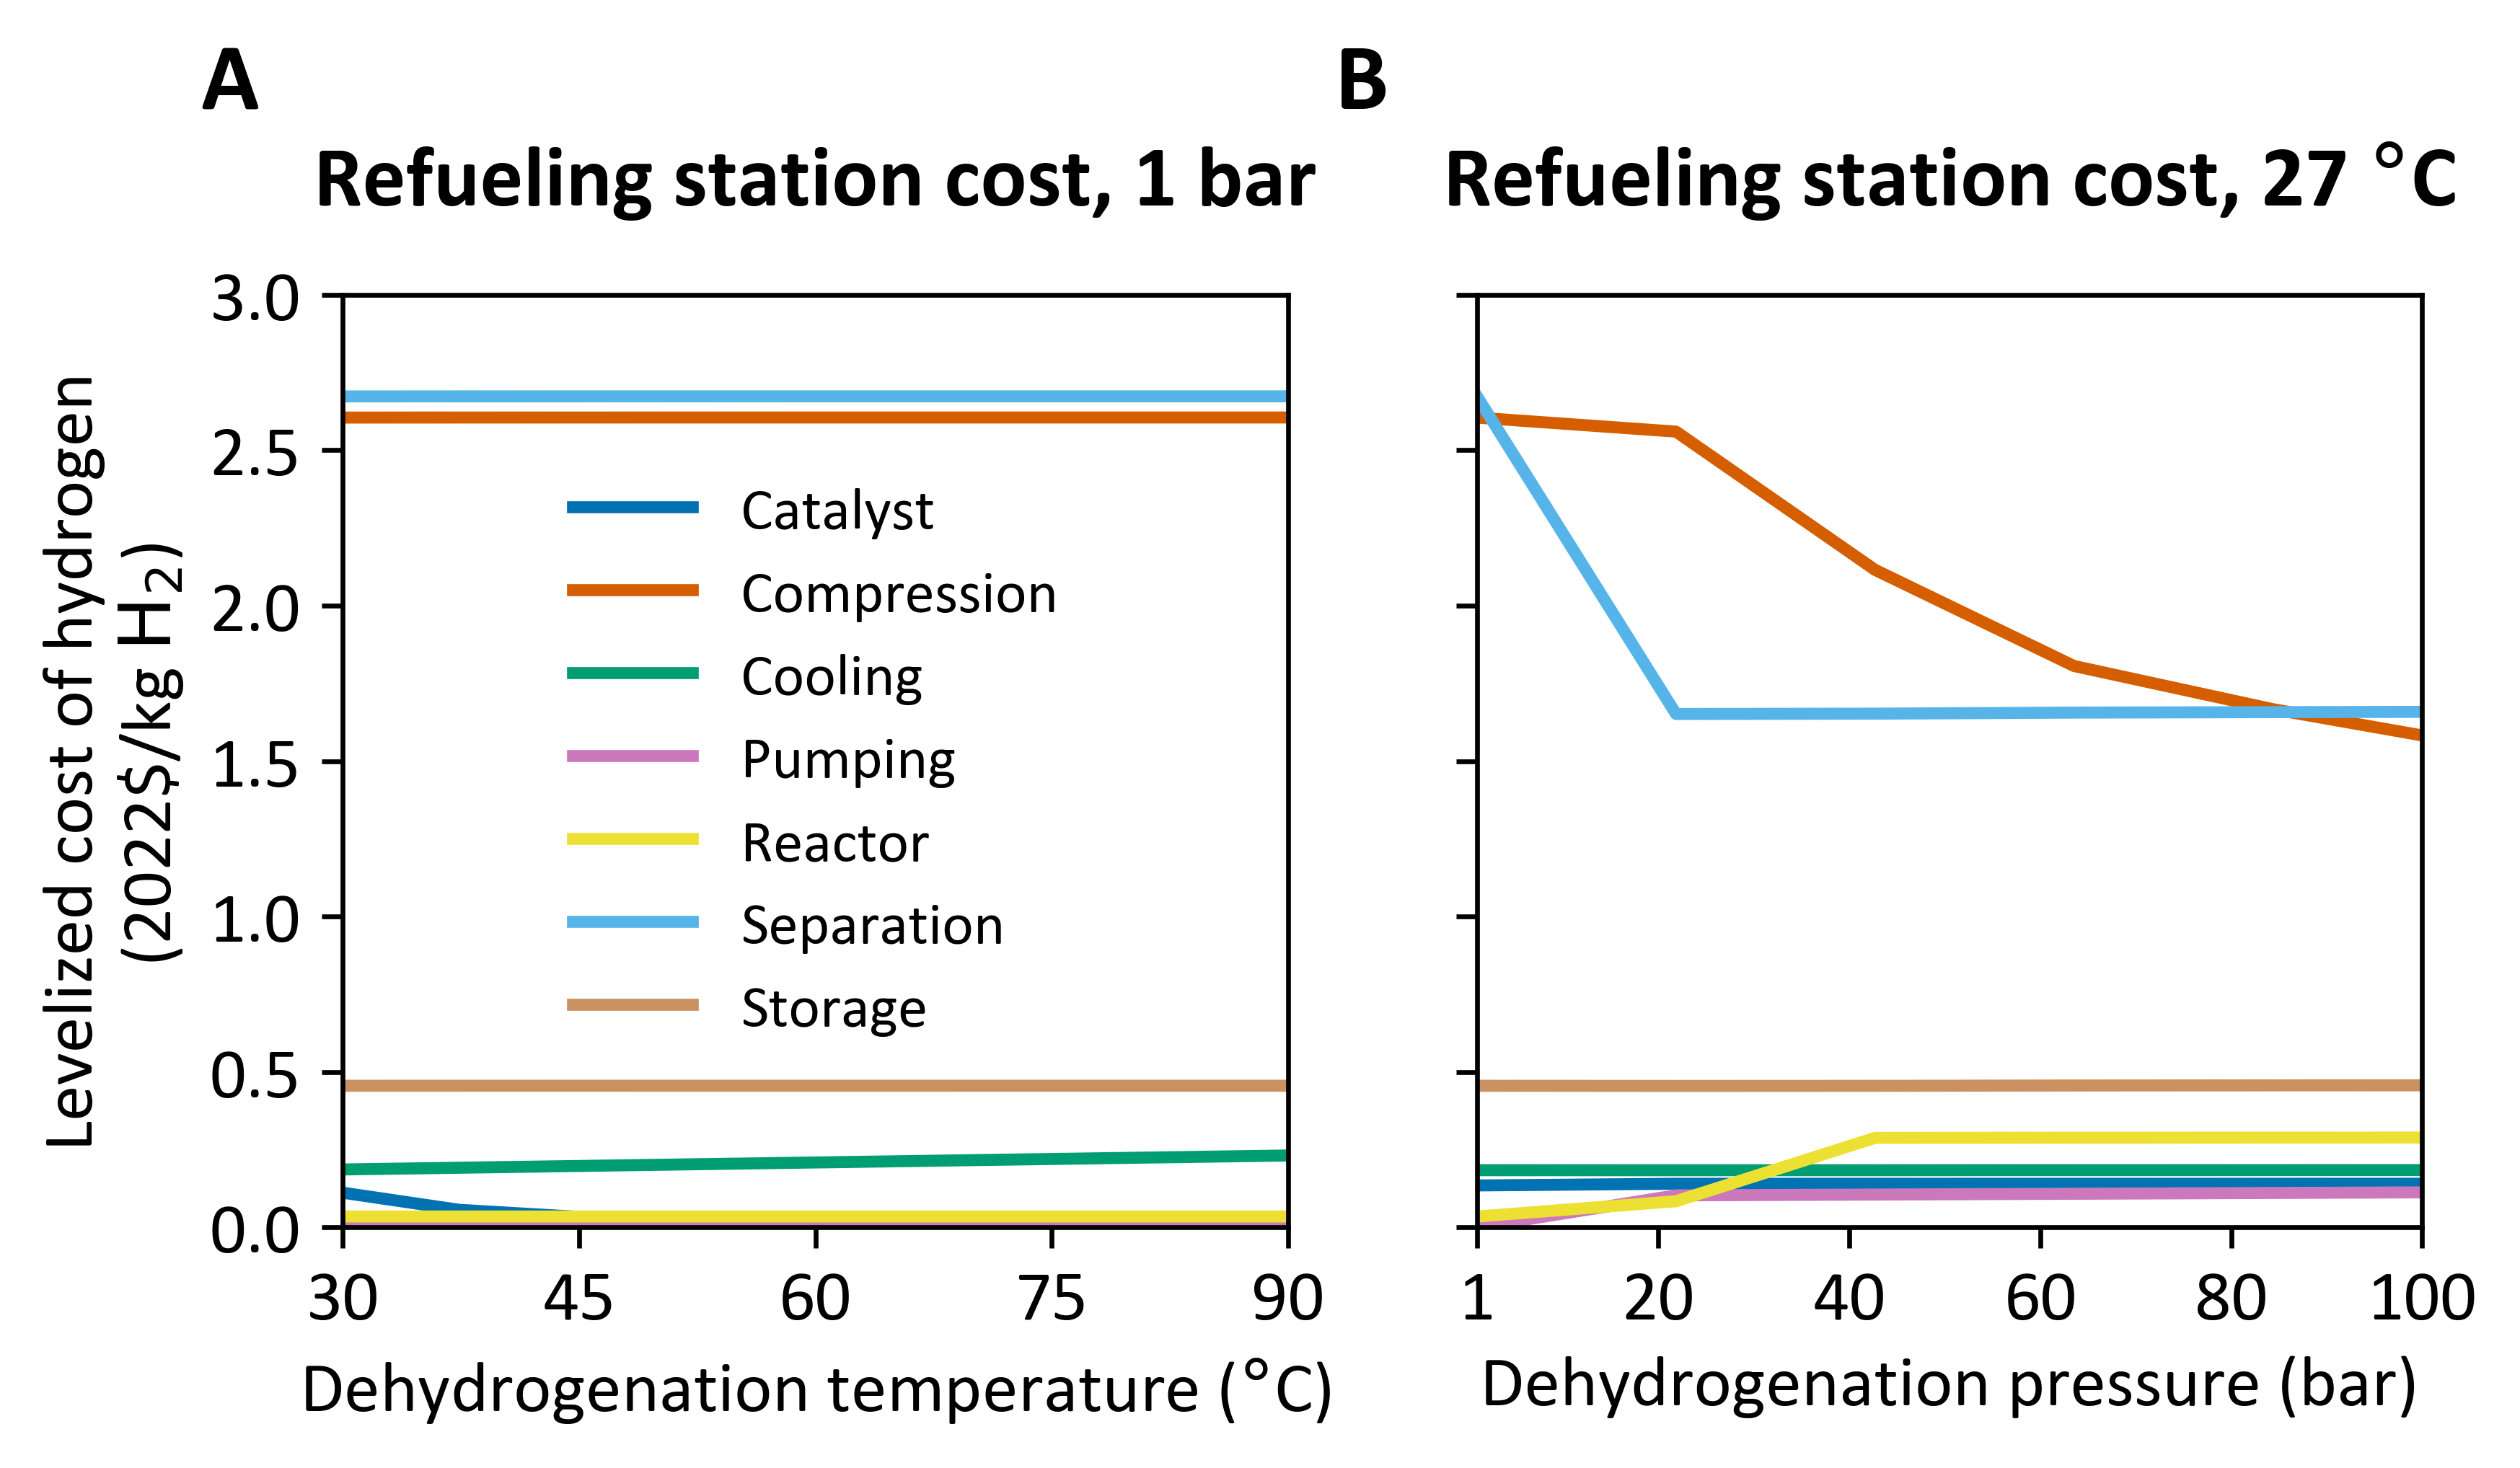

In [21]:
# plot refueling station cost breakdown as function of 
# (a) temperature (at fixed pressure)
# (b) pressure (at fixed temperature)

# create subplots
fig, ax = plt.subplots(
    figsize=(6.2, 2.8),
    ncols=2, 
    sharey=True, 
    dpi=600
    )

# fill subplots
for i in range(len(stn_functions)):
    ax[0].plot(
        df_stn_remap_fix_pres['dehydr. reaction temperature (C)'],
        df_stn_remap_fix_pres[stn_functions[i]],
        color=colors[i],
        linewidth=2,
    )
    ax[1].plot(
        df_stn_remap_fix_temp['dehydr. reaction pressure (bar)'],
        df_stn_remap_fix_temp[stn_functions[i]],
        color=colors[i],
        linewidth=2,
    )

# update subplot tiles
ax[0].set_title(
    'Refueling station cost, {:0.0f} bar'.format(base_pres_bar),
    fontweight='bold',
    pad=15
)
ax[1].set_title(
    'Refueling station cost, {:0.0f} $\degree$C'.format(base_temp_C),
    fontweight='bold',
    pad=15
)

# add subplot numbering
ax[0].annotate(
    'A', 
    xy=(-0.15, 1.2), 
    xycoords='axes fraction', 
    annotation_clip=False,
    fontsize=16,
    fontweight='bold'
)
ax[1].annotate(
    'B', 
    xy=(-0.15, 1.2), 
    xycoords='axes fraction', 
    annotation_clip=False,
    fontsize=16,
    fontweight='bold'
)

# add legend
handles, labels=ax[0].get_legend_handles_labels()

labels_new = []
for label in stn_functions:
    labels_new.append(label.capitalize())

ax[0].legend(
    labels=labels_new, 
    frameon=False, 
    loc='center',
    fontsize='small',
    )

# update axis settings
ax[0].set_xlim(30, 90)
ax[0].set_xticks(np.linspace(30, 90, 5))
ax[0].set_xlabel('Dehydrogenation temperature ($\degree$C)')

ax[1].set_xlim(1, 100)
ax[1].set_xticks([1, 20, 40, 60, 80, 100])
ax[1].set_xlabel('Dehydrogenation pressure (bar)')

ax[0].set_ylim(0, 3)
ax[0].set_ylabel(
    'Levelized cost of hydrogen\n' + \
    ' ({:0.0f}\$/kg'.format(output_dollar_year) + \
    ' ${H_2}$)')

# save plot
plt.savefig(
    'station cost breakdown vs T and p.svg',
    bbox_inches='tight'
    )

# show plot
plt.show()

### 2D PLOT: (a) catalytic rate and (b) total refueling station cost vs. dehydrogenation temperature and pressure

In [22]:
# pivot dataframe
df_stn_tot_pivot = df_stn_tot.pivot(
    columns='dehydr. reaction temperature (C)',
    index='dehydr. reaction pressure (bar)',
    values='$/kg H2'
    )

df_stn_tot_pivot

dehydr. reaction temperature (C),26.850000,37.376316,47.902632,58.428947,68.955263,79.481579,90.007895
dehydr. reaction pressure (bar),,,,,,,
1.000000,6.087458,6.017401,5.993979,5.988519,5.990425,5.995490,6.001987
21.842105,5.177932,5.103211,5.078881,5.073316,5.075276,5.080433,5.087004
42.684211,4.941108,4.866552,4.842020,4.836447,4.838424,4.843585,4.850156
63.526316,4.639777,4.565221,4.540689,4.535102,4.537084,4.542248,4.548819
84.368421,4.505568,4.431012,4.406480,4.400892,4.402870,4.408035,4.414608
100.000000,4.424435,4.349880,4.325348,4.319764,4.321743,4.326918,4.333489


In [23]:
# find dehydr. temperatures and pressures to plot
dehydr_pres_bar = df_stn_tot_pivot.index.tolist()
dehydr_temp_C = df_stn_tot_pivot.columns.tolist()

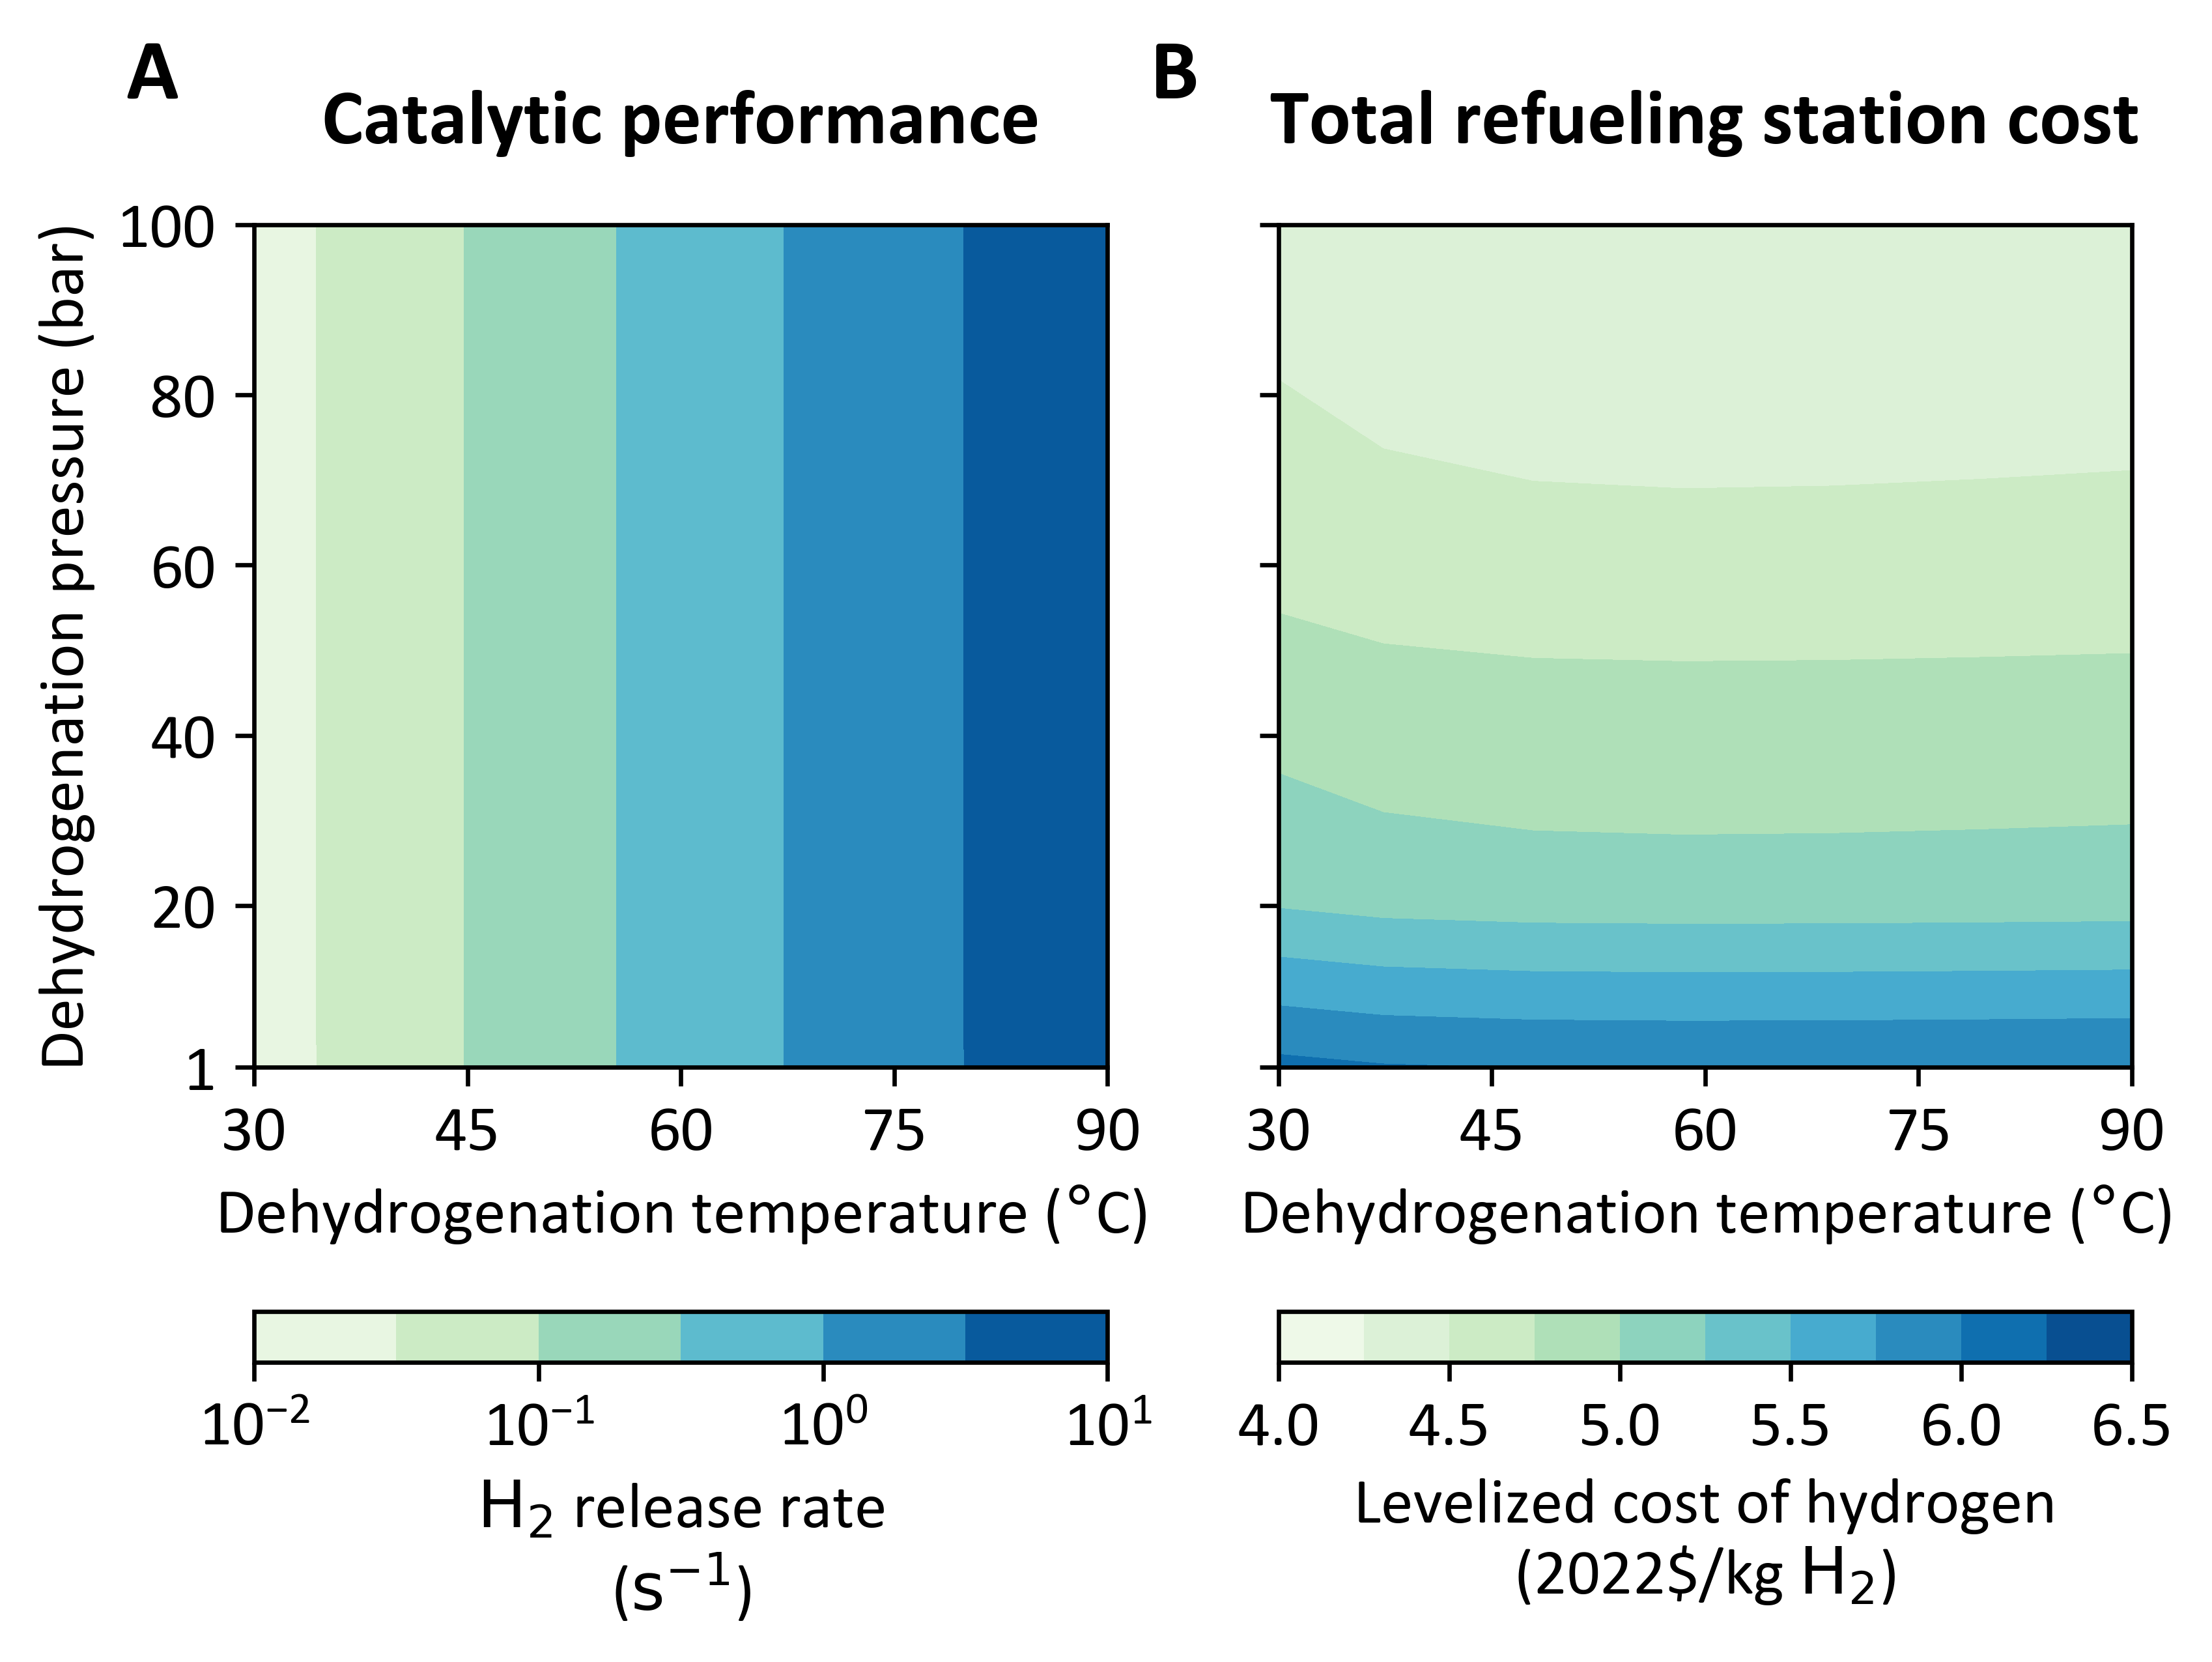

In [24]:
# plot catalytic performance and total refueling station cost
# as function of temperature and pressure    
    
# create subplots
fig, axes = plt.subplots(
    figsize=(6.2, 2.8),
    ncols=2,
    sharey=True,
    dpi=600
    )

# plot catalytic performance
cm0 = axes[0].contourf(
    H2_rate_temp_C,
    H2_rate_pres_bar, 
    df_H2_rate,
    norm=mpl.colors.LogNorm(),
    levels=np.logspace(-2, 1, 7),
    cmap='GnBu',
    )

# plot total refueling station cost
cm1 = axes[1].contourf(
    dehydr_temp_C,
    dehydr_pres_bar, 
    df_stn_tot_pivot,
    levels=np.linspace(4, 6.5, 11),
    cmap='GnBu',
    )

# update subplot titles
axes[0].set_title(
    'Catalytic performance',
    fontweight='bold',
    pad=15
)
axes[1].set_title(
    'Total refueling station cost',
    fontweight='bold',
    pad=15
)

# add subplot numbering
text=['A', 'B']
for i in range(len(axes)):
    axes[i].annotate(
        text[i], 
        xy=(-0.15, 1.15), 
        xycoords='axes fraction', 
        annotation_clip=False,
        fontsize=16,
        fontweight='bold'
    )

# update axesis settings
for ax in axes:
    ax.set_xlim(30, 90)
    ax.set_xticks(np.linspace(30, 90, 5))
    ax.set_xlabel('Dehydrogenation temperature ($\\degree$C)')
axes[0].set_ylim(1, 100)
axes[0].set_yticks([1, 20, 40, 60, 80, 100])
axes[0].set_ylabel('Dehydrogenation pressure (bar)')

# update colorbar settings
cb0 = fig.colorbar(
    cm0, 
    cax=axes[0].inset_axes([0, -0.35, 1, 0.06]),
    orientation='horizontal',
    ticks=np.logspace(-2, 2, 5),
    label='${H_2}$ release rate\n($s^{-1}$)',
)
cb0.ax.minorticks_off()

cb1 = fig.colorbar(
    cm1, 
    cax=axes[1].inset_axes([0, -0.35, 1, 0.06]),
    orientation='horizontal',
    ticks=np.linspace(4, 6.5, 6),
    label='Levelized cost of hydrogen\n({:0.0f}\\$/kg'.format(
        output_dollar_year) + ' ${H_2}$)',
)

# save plot
plt.savefig(
    'total station cost vs T and p.png',
    bbox_inches='tight'
    )

plt.show()

In [25]:
(df_H2_rate.min().min(), df_H2_rate.max().max())

(0.0122693542171047, 7.2899890514019)

In [26]:
(df_stn_tot_pivot.min().min(), df_stn_tot_pivot.max().max())

(4.319763601690588, 6.087457783626428)